# shap_testing8.ipynb
4/1/24

The goal of this document is to find an dlook at the most variable cCREs, potentially modify the ISM codeand test the outputs

In [1]:
#first let's look at some of the most variable
from shap_analysis.ism_utils import ISMUtils
import numpy as np
from tqdm import tqdm
ckpt_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-03-20/16-22-11-658258/checkpoints/10-val_loss=0.38773.ckpt'
util = ISMUtils('DNase_ctst', ckpt_path, classification=True)
var_list = np.zeros(len(util.dataset))
for i in tqdm(range(len(util.dataset)/161), total = len(util.dataset)/161, desc = 'Calculating variance of each sequence'):
    a = util.var(i)
    var_list[i] = a
# print(a)
#find how many elements of var list aren't zero
print(np.count_nonzero(var_list))

TypeError: 'float' object cannot be interpreted as an integer

In [2]:
for i in tqdm(range(len(util.dataset)//161), total = len(util.dataset)//161, desc = 'Calculating variance of each sequence'):
    a = util.var(i)
    var_list[i] = a
print(np.count_nonzero(var_list))

Calculating variance of each sequence: 100%|██████████| 856076/856076 [00:28<00:00, 29818.17it/s]


856076


In [3]:
var_sorted = np.argsort(var_list)
least_highvar = var_sorted[-8000]
least_highvar

639836

In [4]:
idx = 161*least_highvar
out_list = []
target_list = []
for i in range(161):
    a,b = util.dataset[idx+i]
    temp,_ = util.backbone(a.unsqueeze(0))
    out = util.decoder(temp)
    out_list.append(out[0,1].item())
    target_list.append(b[1].item())
print(out_list)

[-1.157782793045044, -1.03904390335083, -1.7142783403396606, -1.7584655284881592, -1.7833223342895508, -1.782271146774292, -1.776527762413025, -1.7016743421554565, -1.3189282417297363, -1.7833707332611084, -1.8001625537872314, -1.454068899154663, -1.459938883781433, -1.7810931205749512, -1.7828805446624756, -1.4718055725097656, -1.4903169870376587, -1.573758840560913, -1.5023802518844604, -1.773972988128662, -1.7195428609848022, -1.394040584564209, -1.5665537118911743, -1.6693230867385864, -1.3463982343673706, -1.2041715383529663, -1.687483549118042, -1.199605107307434, -1.198685884475708, -1.2323639392852783, -1.755817174911499, -1.2943780422210693, -1.664139747619629, -1.0599688291549683, -1.4653925895690918, -1.832376480102539, -1.656346321105957, -0.3778614401817322, -0.5652734041213989, -0.5617263317108154, -0.6083197593688965, -0.6978411674499512, -0.6045680046081543, -0.618767499923706, -0.7167511582374573, -0.3659694492816925, -0.6053200960159302, -0.6655645370483398, -0.550923

In [6]:
#compare this to the output_all
out_list2 = util.output_all(least_highvar) #wait need to modify that function still lol

RuntimeError: a Tensor with 2 elements cannot be converted to Scalar

In [8]:
var_list[least_highvar] #variance is still quite high at 15!!

14.95405562979299

In [9]:
np.var(out_list)
#uhhhh, that's not good?? let's double check the way it calculates variance?

0.20115386703832688

In [11]:
np.var(target_list) #ok wait we're good, it's target we should be looking at, so we are fine!

14.954055638685526

<Axes: ylabel='Count'>

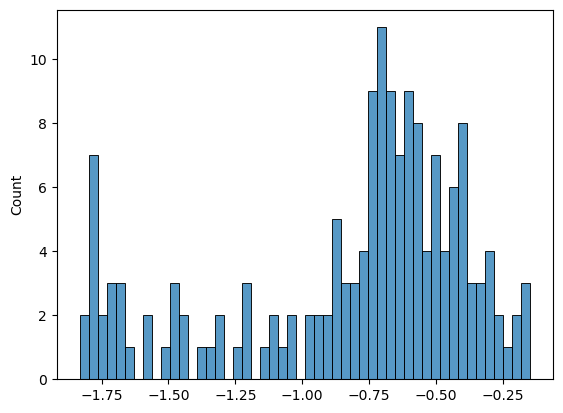

In [10]:
import seaborn as sns
#now do histogram of out_list
sns.histplot(out_list, bins = 50)
#uhhhhh

<Axes: ylabel='Count'>

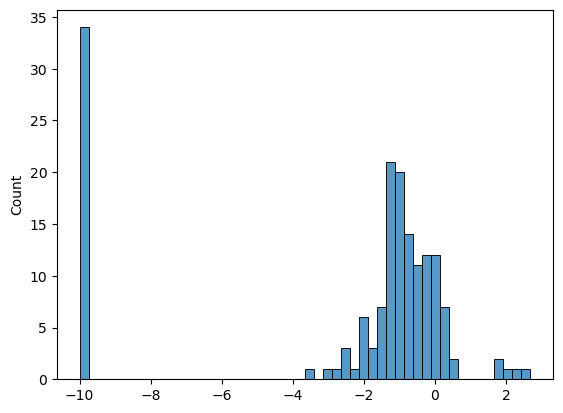

In [12]:
sns.histplot(target_list, bins = 50)

In [13]:
def find_ccre_type(util, idx):
    #this function will use the ccre id to find the specific type
    #uses the ccre id, not the dataset index, just like for the var
    #first get the id
    ccre_id = util.dataset.array[idx][0]
    line = np.where(util.bed[:,3] == ccre_id)
    return util.bed[line[0][0], -1]

In [18]:
#now we're going to find the top 10k that are also distal enhancers
dels_list = np.zeros(var_list.shape)
for i in tqdm(range(len(util.dataset)//161), total = len(util.dataset)//161, desc = 'finding types of ccre'):
    ccre_type = find_ccre_type(util, i)
    # print(ccre_type)
    # break
    if 'dELS' in ccre_type:
        dels_list[i] = 1
        # break

finding types of ccre:   0%|          | 834/856076 [00:19<5:26:05, 43.71it/s]


KeyboardInterrupt: 

In [20]:
#this is way too slow, it's that np.where for sure
print(util.bed.shape)
print(util.bed[:,3]) #the ids, it does string comparison...

(1063878, 6)
['EH38D4327509' 'EH38D4327520' 'EH38D4327525' ... 'EH38D6144588'
 'EH38D4327371' 'EH38D4327372']


In [17]:
ccre_type

'dELS'

In [23]:
util.dataset.array[:,0] #this is the list of ids

array(['EH38D4327509', 'EH38D4327520', 'EH38D4327525', ...,
       'EH38D6144588', 'EH38D4327371', 'EH38D4327372'], dtype=object)

In [25]:
#let's check the dictionary in the dataset
for i in tqdm(range(len(util.dataset)//161), total = len(util.dataset)//161, desc = 'finding types of ccre'):
    ccre_type = find_ccre_type(util, i)
    # print(ccre_type)
    # break
    if 'dELS' in ccre_type:
        dels_list[i] = 1
        print(ccre_type)
        print(i)
        break
util.dataset.cCRE_dict[i] #ah no this one goes based off of the id, so this is different, defining this dictionaroy isn't hard tho

finding types of ccre:   0%|          | 5/856076 [00:00<12:47:46, 18.58it/s]


dELS
5


KeyError: 5

In [26]:
def find_ccre_type(util, idx):
    #this function will use the ccre id to find the specific type
    #uses the ccre id, not the dataset index, just like for the var
    #first get the id
    #actually, first it generates the dictionary of ids
    if util.ccre_id_dict is None: #checks to see if the dictionary is none
        util.ccre_id_dict = {}
        for i,item in enumerate(util.bed[:,3]): #goes through 3rd column of bed file which is the ccre id, now instead of finding that index, goes into dict
            util.ccre_id_dict[item] = i #now uses the ccre_id to find the line
    ccre_id = util.dataset.array[idx][0]
    # line = np.where(util.bed[:,3] == ccre_id)
    line = util.ccre_id_dict[ccre_id]
    return util.bed[line, -1]

In [27]:
util.ccre_id_dict = None

In [28]:
find_ccre_type(util, 0)

'CTCF-only,CTCF-bound'

In [29]:
find_ccre_type(util,0) #instant cuz no dictionary lookup, now let's test it with the first 10 values

'CTCF-only,CTCF-bound'

In [30]:
for i in range(20):
    print(find_ccre_type(util, i))

CTCF-only,CTCF-bound
pELS,CTCF-bound
DNase-H3K4me3,CTCF-bound
CTCF-only,CTCF-bound
CTCF-only,CTCF-bound
dELS
dELS
PLS,CTCF-bound
PLS,CTCF-bound
pELS,CTCF-bound
pELS
pELS,CTCF-bound
PLS
pELS,CTCF-bound
pELS,CTCF-bound
pELS
pELS
pELS
pELS,CTCF-bound
pELS,CTCF-bound


In [31]:
def find_ccre_type_old(util, idx):
    #this function will use the ccre id to find the specific type
    #uses the ccre id, not the dataset index, just like for the var
    #first get the id
    ccre_id = util.dataset.array[idx][0]
    line = np.where(util.bed[:,3] == ccre_id)
    return util.bed[line[0][0], -1]
for i in range(20):
    print(find_ccre_type_old(util, i))

CTCF-only,CTCF-bound
pELS,CTCF-bound
DNase-H3K4me3,CTCF-bound
CTCF-only,CTCF-bound
CTCF-only,CTCF-bound
dELS
dELS
PLS,CTCF-bound
PLS,CTCF-bound
pELS,CTCF-bound
pELS
pELS,CTCF-bound
PLS
pELS,CTCF-bound
pELS,CTCF-bound
pELS
pELS
pELS
pELS,CTCF-bound
pELS,CTCF-bound


In [32]:
#now we can redo the dels_list
#now we're going to find the top 10k that are also distal enhancers
dels_list = np.zeros(var_list.shape)
for i in tqdm(range(len(util.dataset)//161), total = len(util.dataset)//161, desc = 'finding types of ccre'):
    ccre_type = find_ccre_type(util, i)
    # print(ccre_type)
    # break
    if 'dELS' in ccre_type:
        dels_list[i] = 1
        # break
#from 5 hours to 2 seconds

finding types of ccre: 100%|██████████| 856076/856076 [00:02<00:00, 397976.09it/s]


In [33]:
print(sum(dels_list))

634251.0


In [34]:
print(len(dels_list))

137828236


In [36]:
print(var_list.shape)

(137828236,)


# redo this with the class implementation

In [1]:
#first let's look at some of the most variable
from shap_analysis.ism_utils import ISMUtils
import numpy as np
from tqdm import tqdm
ckpt_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-03-20/16-22-11-658258/checkpoints/10-val_loss=0.38773.ckpt'
util = ISMUtils('DNase_ctst', ckpt_path, classification=True)
var_list = np.zeros(len(util.dataset)//161)
for i in tqdm(range(len(util.dataset)//161), total = len(util.dataset)//161, desc = 'Calculating variance of each sequence'):
    a = util.var(i)
    var_list[i] = a
# print(a)
#find how many elements of var list aren't zero
print(np.count_nonzero(var_list)) #none of them are 0, perfect!
print(var_list.shape)

Calculating variance of each sequence: 100%|██████████| 856076/856076 [00:33<00:00, 25656.20it/s]


856076


AttributeError: module 'numpy' has no attribute 'var_list'

In [2]:
print(var_list.shape)

(856076,)


In [3]:
dels_list = np.zeros(len(util.dataset)//161)
for i in tqdm(range(len(util.dataset)//161), total = len(util.dataset)//161, desc = 'finding type of ccre'):
    ccretype = util.find_ccre_type(i)
    if 'dELS' in ccretype:
        dels_list[i] = 1
    # dels_list[i] = 'dELS' in ccretype
print(sum(dels_list))
print(len(dels_list))

finding type of ccre: 100%|██████████| 856076/856076 [00:02<00:00, 304206.52it/s]


634251.0
856076


In [4]:
#almost all of them are distal enhancers?? a little bit concerning?
new_var_list = var_list[dels_list == 1]
print(new_var_list.shape)

(634251,)


In [5]:
#now we sort this then find the 8000th highest
var_sorted = np.argsort(new_var_list)
least_highvar = var_sorted[-8000]
least_highvar

629929

In [6]:
print(new_var_list[least_highvar])

14.016658068319467


In [7]:
#now we can look at the output of this
idx = 161*least_highvar
out_list = []
target_list = []
for i in range(161):
    a,b = util.dataset[idx+i]
    temp,_ = util.backbone(a.unsqueeze(0))
    out = util.decoder(temp)
    out_list.append(out[0,1].item())
    target_list.append(b[1].item())
    

<Axes: ylabel='Count'>

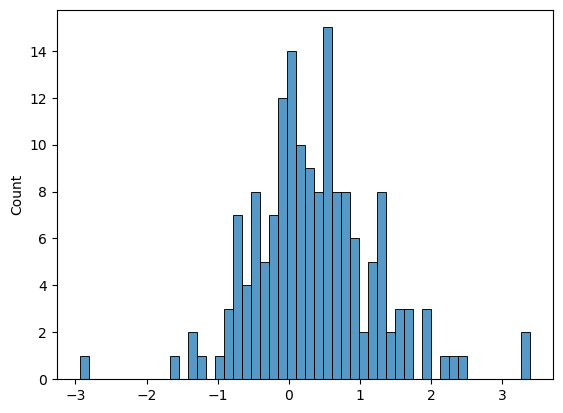

In [9]:
import seaborn as sns
#now do histogram of out_list
sns.histplot(target_list, bins = 50)

In [10]:
np.var(target_list)

0.7528409066401808

In [11]:
#oh wait, we filtered the list, that means indices don't line up anymore! let's redo this with the var_list
masked_var_list = np.where(dels_list == 1, var_list, -np.inf)
#now we sort this then find the 8000th highest
var_sorted = np.argsort(masked_var_list)
least_highvar = var_sorted[-8000]
print(var_list[least_highvar])

14.016658068319467


In [12]:
least_highvar

850742

In [13]:
#now we can look at the output of this
idx = 161*least_highvar
out_list = []
target_list = []
for i in range(161):
    a,b = util.dataset[idx+i]
    temp,_ = util.backbone(a.unsqueeze(0))
    out = util.decoder(temp)
    out_list.append(out[0,1].item())
    target_list.append(b[1].item())
    

<Axes: ylabel='Count'>

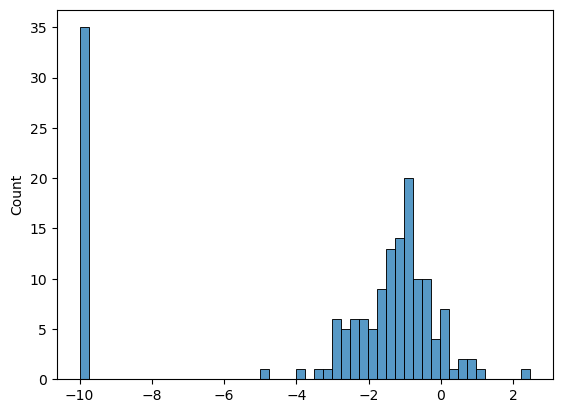

In [14]:
#now do histogram of target_list
sns.histplot(target_list, bins = 50)

#so high variable ones generally not too much variance in the open regions, lots of closed ones still

<Axes: ylabel='Count'>

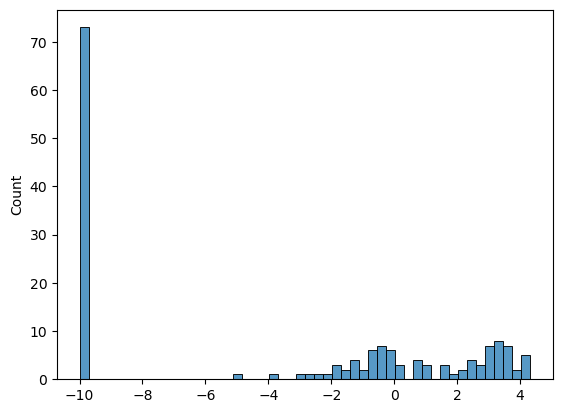

In [15]:
high_var = var_sorted[-1]
#now we can look at the output of this
idx = 161*high_var
out_list = []
target_list = []
for i in range(161):
    a,b = util.dataset[idx+i]
    temp,_ = util.backbone(a.unsqueeze(0))
    out = util.decoder(temp)
    out_list.append(out[0,1].item())
    target_list.append(b[1].item())

#now do histogram of target_list
sns.histplot(target_list, bins = 50)

In [16]:
#this approach works and makes sense!! now we need to look at the total size, then we will find the indices across val/test

total_elements = 4 * 1024 * 161
size_per_element_bytes = 8  # float64 uses 8 bytes
total_storage_bytes = total_elements * size_per_element_bytes

total_storage_kb = total_storage_bytes / 1024
total_storage_mb = total_storage_kb / 1024

print(f"Total storage: {total_storage_bytes} bytes")
print(f"Total storage: {total_storage_kb} KB")
print(f"Total storage: {total_storage_mb} MB") #for a single sequence

Total storage: 5275648 bytes
Total storage: 5152.0 KB
Total storage: 5.03125 MB


In [17]:
total_elements = 4 * 1024 * 161 * 10000
size_per_element_bytes = 8  # float64 uses 8 bytes
total_storage_bytes = total_elements * size_per_element_bytes

total_storage_kb = total_storage_bytes / 1024
total_storage_mb = total_storage_kb / 1024
total_storage_gb = total_storage_mb / 1024

# print(f"Total storage: {total_storage_bytes} bytes")
# print(f"Total storage: {total_storage_kb} KB")
# print(f"Total storage: {total_storage_mb} MB")
print(f"Total storage: {total_storage_gb} GB") #for 10k sequences

#we'll use 16 bit

Total storage: 49.13330078125 GB


In [21]:
# A large value that can be represented in float32 but would overflow in float16
large_value = np.array([1e+20], dtype=np.float32)

# Convert to float16
converted = large_value.astype(np.float16)

print("Original:", large_value)
print("Converted:", converted)

Original: [1.e+20]
Converted: [inf]


In [23]:
#check for inf values in array
np.isinf(converted)

array([ True])

In [20]:
# A large value that can be represented in float32 but would overflow in float16
large_value = np.array([1e-20], dtype=np.float32)

# Convert to float16
converted = large_value.astype(np.float16)

print("Original:", large_value)
print("Converted:", converted)

Original: [1.e-20]
Converted: [0.]


In [25]:
#now the hard part, we need to find the indices of the top 10000 across train/val/test
util_val = ISMUtils('DNase_ctst', ckpt_path, classification=True, split = 'val')
util_test = ISMUtils('DNase_ctst', ckpt_path, classification=True, split = 'test')

In [26]:
val_var_list = np.zeros(len(util_val.dataset)//161)
for i in tqdm(range(len(util_val.dataset)//161), total = len(util_val.dataset)//161, desc = 'Calculating variance of each sequence'):
    a = util_val.var(i)
    val_var_list[i] = a
#now dels
val_dels_list = np.zeros(len(util_val.dataset)//161)
for i in tqdm(range(len(util_val.dataset)//161), total = len(util_val.dataset)//161, desc = 'finding type of ccre'):
    ccretype = util_val.find_ccre_type(i)
    if 'dELS' in ccretype:
        val_dels_list[i] = 1
    # dels_list[i] = 'dELS' in ccretype
masked_val_var_list = np.where(val_dels_list == 1, val_var_list, -np.inf)

#now test data
test_var_list = np.zeros(len(util_test.dataset)//161)
for i in tqdm(range(len(util_test.dataset)//161), total = len(util_test.dataset)//161, desc = 'Calculating variance of each sequence'):
    a = util_test.var(i)
    test_var_list[i] = a
#now dels
test_dels_list = np.zeros(len(util_test.dataset)//161)
for i in tqdm(range(len(util_test.dataset)//161), total = len(util_test.dataset)//161, desc = 'finding type of ccre'):
    ccretype = util_test.find_ccre_type(i)
    if 'dELS' in ccretype:
        test_dels_list[i] = 1
    # dels_list[i] = 'dELS' in ccretype
masked_test_var_list = np.where(test_dels_list == 1, test_var_list, -np.inf)

finding type of ccre: 100%|██████████| 105252/105252 [00:00<00:00, 154662.88it/s]


In [27]:
#quite fast! now we have to find the top 10k
#the easiest way is combine the lists but keep track of which one it is
list1,list2,list3 = masked_var_list, masked_val_var_list, masked_test_var_list
combined = np.concatenate([
    np.stack([list1, np.zeros(len(list1))], axis=1),
    np.stack([list2, np.ones(len(list2))], axis=1),
    np.stack([list3, np.full(len(list3), 2)], axis=1),
])
combined #ok so the list value is on the second column, tells us which list it is!

array([[      -inf, 0.        ],
       [      -inf, 0.        ],
       [      -inf, 0.        ],
       ...,
       [3.97049981, 2.        ],
       [4.37392015, 2.        ],
       [3.9976052 , 2.        ]])

In [28]:
top_indices = np.argpartition(-combined[:, 0], 10000)[:10000]

# Step 3: Sort the top indices to get the top 10k in order
top_indices_sorted = top_indices[np.argsort(-combined[top_indices, 0])]

In [29]:
top_values = combined[top_indices_sorted]
original_indices = [(int(value[1]), i) for i, value in enumerate(top_values)]

In [30]:
len(original_indices)

10000

In [31]:
original_indices

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (0, 42),
 (0, 43),
 (0, 44),
 (0, 45),
 (0, 46),
 (0, 47),
 (0, 48),
 (0, 49),
 (0, 50),
 (0, 51),
 (0, 52),
 (0, 53),
 (0, 54),
 (0, 55),
 (0, 56),
 (0, 57),
 (0, 58),
 (0, 59),
 (0, 60),
 (0, 61),
 (0, 62),
 (0, 63),
 (0, 64),
 (0, 65),
 (0, 66),
 (0, 67),
 (0, 68),
 (0, 69),
 (0, 70),
 (0, 71),
 (0, 72),
 (0, 73),
 (0, 74),
 (0, 75),
 (0, 76),
 (0, 77),
 (0, 78),
 (0, 79),
 (0, 80),
 (0, 81),
 (0, 82),
 (0, 83),
 (0, 84),
 (0, 85),
 (0, 86),
 (0, 87),
 (1, 88),
 (0, 89),
 (0, 90),
 (0, 91),
 (0, 92),
 (0, 93),
 (0, 94),
 (0, 95),
 (0, 96),
 (0, 97),
 (0, 98),
 (0, 99),
 (0, 100),

In [32]:
#let's actually sort this list separately on our own
#quite fast! now we have to find the top 10k
#the easiest way is combine the lists but keep track of which one it is
list1,list2,list3 = masked_var_list, masked_val_var_list, masked_test_var_list
combined = np.concatenate([
    np.stack([list1, np.zeros(len(list1))], axis=1),
    np.stack([list2, np.ones(len(list2))], axis=1),
    np.stack([list3, np.full(len(list3), 2)], axis=1),
])
#now we have combined, the first column is the values, second column is the list it came from
#let's find the highest 10k values
top_indices = np.argsort(combined[:,0])[-10000:]
top_indices

array([716808, 784800, 645332, ..., 616768, 616882, 616657])

In [34]:
top_values = combined[top_indices]
top_values

array([[13.89127462,  0.        ],
       [13.89130184,  0.        ],
       [13.89183351,  0.        ],
       ...,
       [32.46634244,  0.        ],
       [32.49429533,  0.        ],
       [33.08527187,  0.        ]])

In [39]:
#now we use top_indices to get the list of indices and the list it came from
original_indices = [(int(value[1]), top_indices[i]) for i, value in enumerate(top_values)]
original_indices #these indices are actually indices from the combined list, so we need to convert them back to the original list

[(0, 716808),
 (0, 784800),
 (0, 645332),
 (0, 814870),
 (0, 421939),
 (0, 849095),
 (0, 709385),
 (0, 715789),
 (2, 1048807),
 (0, 509706),
 (0, 742472),
 (0, 765638),
 (0, 711160),
 (0, 700558),
 (0, 677197),
 (0, 657918),
 (0, 586552),
 (1, 874787),
 (0, 819971),
 (2, 1048779),
 (2, 1007741),
 (2, 1060590),
 (1, 888474),
 (0, 174906),
 (0, 784202),
 (0, 425650),
 (0, 89387),
 (1, 871577),
 (0, 845390),
 (0, 181717),
 (0, 811605),
 (0, 372812),
 (0, 466101),
 (0, 430328),
 (0, 614903),
 (0, 776987),
 (0, 847887),
 (0, 53372),
 (0, 35802),
 (0, 847161),
 (0, 651607),
 (0, 405077),
 (0, 753977),
 (0, 507498),
 (0, 211585),
 (0, 88337),
 (0, 51254),
 (0, 805668),
 (0, 755279),
 (0, 677806),
 (2, 1044890),
 (0, 752545),
 (0, 26238),
 (2, 1023615),
 (0, 720063),
 (0, 82520),
 (0, 638811),
 (0, 109218),
 (0, 486780),
 (0, 769590),
 (2, 1037969),
 (0, 384688),
 (0, 687149),
 (0, 92003),
 (0, 605184),
 (0, 603942),
 (0, 823658),
 (0, 290876),
 (0, 811061),
 (1, 930035),
 (0, 839903),
 (0, 80

In [40]:
#let's now conver thtese indices back to the original list
for i, (list_num, idx) in enumerate(original_indices):
    if list_num == 0:
        original_indices[i] = (0, idx)
    elif list_num == 1:
        original_indices[i] = (1, idx-len(list1))
    else:
        original_indices[i] = (2, idx-len(list1)-len(list2))

In [41]:
original_indices

[(0, 716808),
 (0, 784800),
 (0, 645332),
 (0, 814870),
 (0, 421939),
 (0, 849095),
 (0, 709385),
 (0, 715789),
 (2, 90181),
 (0, 509706),
 (0, 742472),
 (0, 765638),
 (0, 711160),
 (0, 700558),
 (0, 677197),
 (0, 657918),
 (0, 586552),
 (1, 18711),
 (0, 819971),
 (2, 90153),
 (2, 49115),
 (2, 101964),
 (1, 32398),
 (0, 174906),
 (0, 784202),
 (0, 425650),
 (0, 89387),
 (1, 15501),
 (0, 845390),
 (0, 181717),
 (0, 811605),
 (0, 372812),
 (0, 466101),
 (0, 430328),
 (0, 614903),
 (0, 776987),
 (0, 847887),
 (0, 53372),
 (0, 35802),
 (0, 847161),
 (0, 651607),
 (0, 405077),
 (0, 753977),
 (0, 507498),
 (0, 211585),
 (0, 88337),
 (0, 51254),
 (0, 805668),
 (0, 755279),
 (0, 677806),
 (2, 86264),
 (0, 752545),
 (0, 26238),
 (2, 64989),
 (0, 720063),
 (0, 82520),
 (0, 638811),
 (0, 109218),
 (0, 486780),
 (0, 769590),
 (2, 79343),
 (0, 384688),
 (0, 687149),
 (0, 92003),
 (0, 605184),
 (0, 603942),
 (0, 823658),
 (0, 290876),
 (0, 811061),
 (1, 73959),
 (0, 839903),
 (0, 804977),
 (0, 66216

In [42]:
#looks correct, large 6 digit values only for 0 which is train, now let's conver this back to 3 separate lists
train_idx = []
val_idx = []
test_idx = []
for list_num, idx in original_indices:
    if list_num == 0:
        train_idx.append(idx)
    elif list_num == 1:
        val_idx.append(idx)
    else:
        test_idx.append(idx)

print(len(train_idx))
print(len(val_idx))
print(len(test_idx))

8396
830
774


In [44]:
#these results seem correct and very believeable! I think we probably got it right!!
print(len(train_idx)+len(val_idx)+len(test_idx)) #for a total of 10k elements

10000


In [45]:
#the final test is to take a random sample and see the variance, hope it's above like 15 or something
train_idx[0]

716808

In [48]:
print(util.var(train_idx[-1]))

33.08527186691309


In [49]:
print(util.var(train_idx[0])) #seems right??

13.891274623243838


In [50]:
#let's plot the highest train_idx just to test
util.find_ccre_type(train_idx[-1])

'dELS'

<Axes: ylabel='Count'>

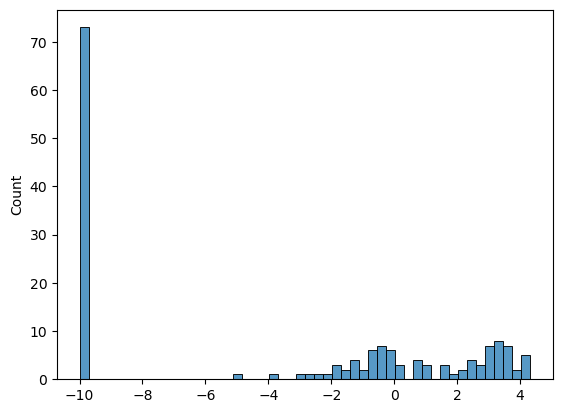

In [51]:
#now plot it
idx = 161*train_idx[-1]
out_list = []
target_list = []
for i in range(161):
    a,b = util.dataset[idx+i]
    temp,_ = util.backbone(a.unsqueeze(0))
    out = util.decoder(temp)
    out_list.append(out[0,1].item())
    target_list.append(b[1].item())
sns.histplot(target_list, bins = 50) #isn't that what we like to see????!!!!!

In [53]:
#let's save these out, first check the data type
print(type(train_idx))

<class 'list'>


In [54]:
np.save('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train_idx.npy', np.array(train_idx))
np.save('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/val_idx.npy', np.array(val_idx))
np.save('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/test_idx.npy', np.array(test_idx))

In [57]:
#test to see variance of the validation ones too
print(util_val.var(val_idx[-1]),util_val.var(val_idx[0]))

26.76852364601814 13.896399111268689


In [58]:
print(util_test.var(test_idx[-1]),util_test.var(test_idx[0])) #seems like we indeed got the top 10k!

24.467912189167986 13.893269064588363
